# Iniciamos el proceso de buscar aquel modelo de predicción del fraude/no fraude que mejor resuelva el problema:

In [ ]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# All rows and columns display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Train processed dataset
df_train = pd.read_csv('./data/train_processed.csv')

In [ ]:
df_train.head().T

,0,1,2,3,4
amt,4.390000,14.960000,32.430000,66.360000,1.153500e+02
gender,0.000000,0.000000,1.000000,0.000000,0.000000e+00
lat,41.606000,48.340000,39.779500,33.746700,3.381550e+01
long,-109.230000,-122.345600,-93.301400,-117.172100,-1.121202e+02
city_pop,27971.000000,85.000000,964.000000,54287.000000,1.312922e+06
merch_lat,41.971530,49.088724,39.155293,33.720708,3.454270e+01
merch_long,-109.512691,-123.344203,-92.421151,-116.381735,-1.112824e+02
is_fraud,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Year,2019.000000,2020.000000,2019.000000,2020.000000,2.019000e+03
Month,2.000000,3.000000,7.000000,6.000000,5.000000e+00


Ya vimos que se trata de un problema **muy desbalanceado** en cuanto a la variable `is_fraud`. Vamos a hacer uso de la librería `imbalanced-learn` para mejorar el aprendizaje de los modelos que probemos:

https://imbalanced-learn.org/stable/

## En concreto, aplicaremos la estrategia de *undersampling* con *Random Under Sampler* para equilibrar las clases de fraude / no fraude:

In [ ]:
!pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Convert to values format for RandomUnderSampler ("rus")
X = df_train.drop(['is_fraud'], axis = 1)
y = df_train['is_fraud']

resampler = RandomUnderSampler(sampling_strategy='auto', random_state=17)
X_resampled, y_resampled = resampler.fit_resample(X, y)

# Build a **new DF with this undersampling**
df_train_rus = pd.DataFrame(X_resampled, columns=X.columns)
df_train_rus['is_fraud'] = y_resampled

Ahora tenemos que volver a separar la variable objetivo, `is_fraud`, de las demás del dataset `df_train_rus`:

In [ ]:
X_train = df_train_rus.drop(['is_fraud'], axis = 1)
y_train = df_train_rus['is_fraud']

En este punto, es importante **normalizar** las variables numéricas (no es necesario en aquellas que aplicamos Encoders o en las que son binarias):

In [ ]:
# Split X_train into normalizing variables and not-normalizing

variables_tonorm = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'Year', 'Month', 'Unemployed percent', 'close_s&p_500','change_usd_eur','crime_rate', 'age', 'week_number','day_of_week','day', 'hour', 'merch_home_distance']
X_train_tonorm = X_train[variables_tonorm]
X_train_notnorm = X_train.drop(variables_tonorm, axis = 1)

# Normalize
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler().fit(X_train_tonorm)
X_train_normalized = scaler_X.transform(X_train_tonorm)

# Join all variables together:

X_train_notnorm = X_train_notnorm.values
X_train = np.concatenate([X_train_normalized, X_train_notnorm], axis = 1)

Cargamos el dataset de Test procesado:

In [ ]:
# Train processed dataset
df_test = pd.read_csv('./data/test_processed.csv')

In [ ]:
# Same steps, USING **TRAIN SCALER**

X_test = df_test.drop(['is_fraud'], axis = 1)
y_test = df_test['is_fraud']

X_test_tonorm = X_test[variables_tonorm]
X_test_notnorm = X_test.drop(variables_tonorm, axis = 1)

X_test_normalized = scaler_X.transform(X_test_tonorm)

X_test_notnorm = X_test_notnorm.values
X_test = np.concatenate([X_test_normalized, X_test_notnorm], axis = 1)

## Iniciamos la búsqueda de modelos que hagan la predicción del fraude/no fraude:

Importamos librerías y herramientas muy útiles:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,roc_auc_score, roc_curve, f1_score
from sklearn.metrics import classification_report

Definimos una función que nos ayude a representar nuestras métricas:

In [ ]:
LABELS= ['Not_fraud','Fraud']
def results(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, cmap="crest", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

### Empezamos con el modelo más sencillo posible para problemas de clasificación: **Regresión Logística**

Parámetros:

- `c` lo buscaremos con GridSearch
- `class_weight` = 'balanced' para que ajuste los pesos ("penalice") de forma inversamente proporcional a la frequencia de cada clase
- `random_state` = 17 como hemos venido utilizando
- `solver` = "lbfgs" el solver por defecto

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best mean cross-validation score: 0.917
best parameters: {'C': 10.0}
Log (C): 1.0


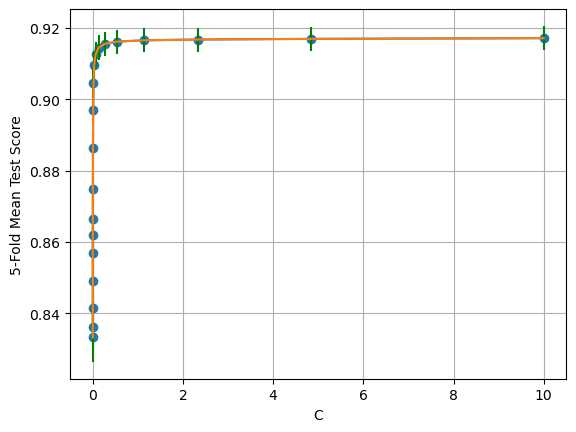

In [ ]:
cVector = np.logspace(-5, 1, 20)
param_grid = {'C': cVector}

grid = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=17, solver="lbfgs"),
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv=5,
                    verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print(f"Log (C): {math.log10(grid.best_params_['C'])}")

scores = np.array(grid.cv_results_['mean_test_score'])  #better "validation score"
stdvalues = np.array(grid.cv_results_['std_test_score'])
plt.plot(cVector,scores,'-o')
plt.errorbar(cVector, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('C')
plt.ylabel('5-Fold Mean Test Score')
plt.grid()
plt.show()


In [ ]:
Copt = grid.best_params_['C']

In [ ]:
lr = LogisticRegression(C=Copt, class_weight = 'balanced', random_state=17, solver="lbfgs").fit(X_train,y_train)

In [ ]:
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) # Compute the F1 score ("balanced F-score") Very interesting in imbalanced datasets

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]


print("Accuracy del modelo Regresión Logística:", accuracy)
print("Precisión del modelo Regresión Logística:", precision)
print("Recall del modelo Regresión Logística:", recall)
print("F1-Score del modelo Regresión Logística:", f1)
print("-----")
print("Verdaderos Positivos:", TP)
print("Falsos Negativos:", FN)
print("Falsos Positivos:", FP)
print("Verdaderos Negativos:", TN)

Accuracy del modelo Regresión Logística: 0.8910545536994
Precisión del modelo Regresión Logística: 0.035014276726516
Recall del modelo Regresión Logística: 0.7497409326424871
F1-Score del modelo Regresión Logística: 0.06690401331607176
-----
Verdaderos Positivos: 1447
Falsos Negativos: 483
Falsos Positivos: 39879
Verdaderos Negativos: 328670


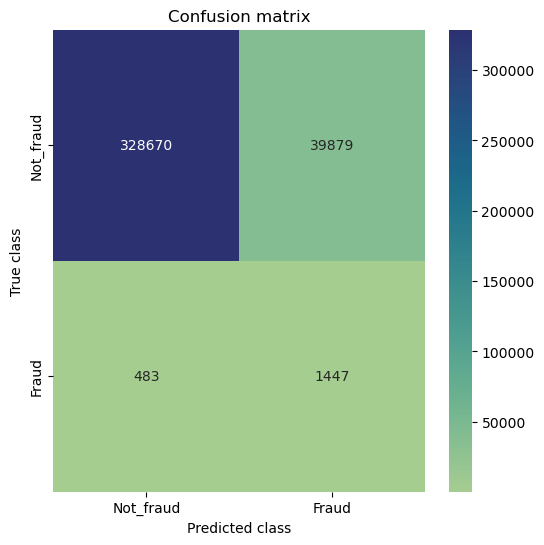

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    368549
           1       0.04      0.75      0.07      1930

    accuracy                           0.89    370479
   macro avg       0.52      0.82      0.50    370479
weighted avg       0.99      0.89      0.94    370479



In [ ]:
results(y_test, y_pred)

Como vemos en la gráfica que apenas hay mejora del score a partir de un punto, vamos a probar con un valor de "C" menor:

In [ ]:
lr = LogisticRegression(C=0.1, class_weight = 'balanced', random_state=17, solver="lbfgs").fit(X_train,y_train)

In [ ]:
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) # Compute the F1 score ("balanced F-score") Very interesting in imbalanced datasets

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]


print("Accuracy del modelo Regresión Logística:", accuracy)
print("Precisión del modelo Regresión Logística:", precision)
print("Recall del modelo Regresión Logística:", recall)
print("F1-Score del modelo Regresión Logística:", f1)
print("-----")
print("Verdaderos Positivos:", TP)
print("Falsos Negativos:", FN)
print("Falsos Positivos:", FP)
print("Verdaderos Negativos:", TN)

Accuracy del modelo Regresión Logística: 0.9026017669017677
Precisión del modelo Regresión Logística: 0.03865895828830776
Recall del modelo Regresión Logística: 0.7414507772020725
F1-Score del modelo Regresión Logística: 0.07348636573717456
-----
Verdaderos Positivos: 1431
Falsos Negativos: 499
Falsos Positivos: 35585
Verdaderos Negativos: 332964


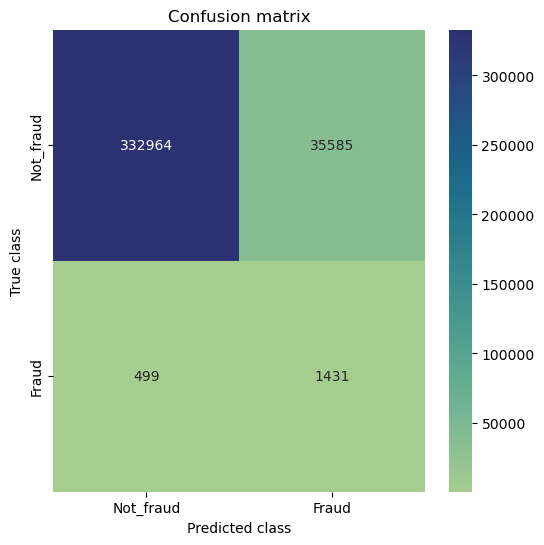

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    368549
           1       0.04      0.74      0.07      1930

    accuracy                           0.90    370479
   macro avg       0.52      0.82      0.51    370479
weighted avg       0.99      0.90      0.94    370479



In [ ]:
results(y_test, y_pred)

Hay una ligera mejora, nos interesa sobre todo minimizar los *falsos positivos* y hemos mejorado esa métrica aunque siguen siendo valores demasiado elevados.

Por tanto, a pesar de haber optimizado la Regresión Logística con GridSearch y de haber probado otros puntos de "C", es un modelo claramente mejorable, recall muy pobre en los casos de fraude y alta tasa de falsos positivos (no nos interesa desde el punto de vista de Negocio)

## Vamos a continuar con un **Decision Tree Classifier**

### Decision Tree con GridSearchCV para buscar la profundidad óptima (f1-score):

Fitting 10 folds for each of 14 candidates, totalling 140 fits
best mean cross-validation score: 0.966
best parameters: {'max_depth': 14}


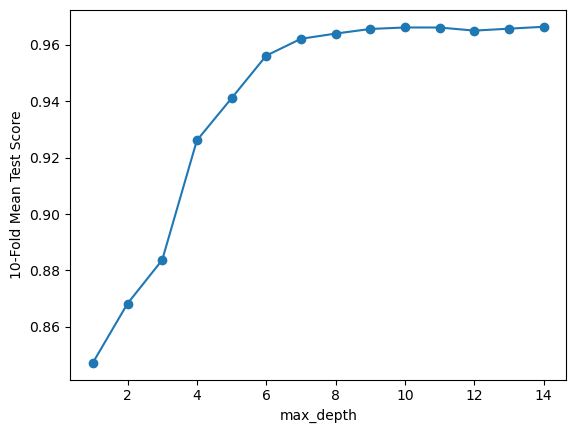

In [ ]:
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=17), param_grid=param_grid, scoring='f1', cv = 10, verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])  #better "validation score"

plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-Fold Mean Test Score')
#plt.ylim((-1, 0))
plt.show()

In [ ]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo, class_weight='balanced', random_state=17).fit(X_train,y_train)

y_pred = treeModel.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) # Compute the F1 score ("balanced F-score") Very interesting in imbalanced datasets

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]


print("Accuracy del modelo DecisionTree optimizando la profundidad con GridSearchCV:", accuracy)
print("Precisión del modelo DecisionTree optimizando la profundidad con GridSearchCV:", precision)
print("Recall del modelo DecisionTree optimizando la profundidad con GridSearchCV:", recall)
print("F1-Score del modelo DecisionTree optimizando la profundidad con GridSearchCV:", f1)
print("-----")
print("Verdaderos Positivos:", TP)
print("Falsos Negativos:", FN)
print("Falsos Positivos:", FP)
print("Verdaderos Negativos:", TN)

Accuracy del modelo DecisionTree optimizando la profundidad con GridSearchCV: 0.9710995764942143
Precisión del modelo DecisionTree optimizando la profundidad con GridSearchCV: 0.1477646681114054
Recall del modelo DecisionTree optimizando la profundidad con GridSearchCV: 0.9538860103626943
F1-Score del modelo DecisionTree optimizando la profundidad con GridSearchCV: 0.25588991590798527
-----
Verdaderos Positivos: 1841
Falsos Negativos: 89
Falsos Positivos: 10618
Verdaderos Negativos: 357931


Pintamos estas métricas en la matriz de confusión:

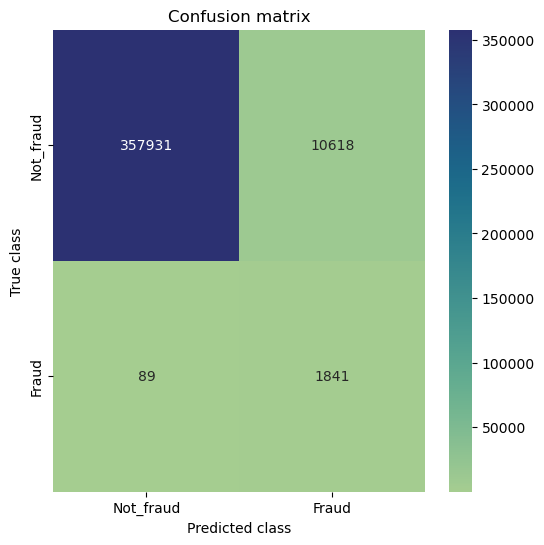

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    368549
           1       0.15      0.95      0.26      1930

    accuracy                           0.97    370479
   macro avg       0.57      0.96      0.62    370479
weighted avg       1.00      0.97      0.98    370479



In [ ]:
results(y_test, y_pred)

Representamos la curva ROC, muy interesante para valorar:

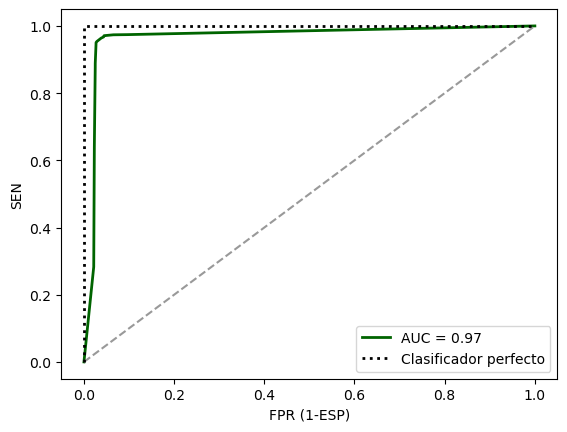

In [ ]:
y_prob = treeModel.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkgreen',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

### Aunque *cross-validation* nos da que la mejor profundidad es 14, vemos en la primera gráfica (la de GridSearch) que a partir de 10 aprox ya no mejora mucho el F1-Score, vamos a probar con ese valor:

In [ ]:
treeModel = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=17).fit(X_train,y_train)

y_pred = treeModel.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) # Compute the F1 score ("balanced F-score") Very interesting in imbalanced datasets

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]


print("Accuracy del modelo DecisionTree con 10 niveles de profundidad:", accuracy)
print("Precisión del modelo DecisionTree con 10 niveles de profundidad:", precision)
print("Recall del modelo DecisionTree con 10 niveles de profundidad:", recall)
print("F1-Score del modelo DecisionTree con 10 niveles de profundidad:", f1)
print("-----")
print("Verdaderos Positivos:", TP)
print("Falsos Negativos:", FN)
print("Falsos Positivos:", FP)
print("Verdaderos Negativos:", TN)

Accuracy del modelo DecisionTree con 10 niveles de profundidad: 0.9580327090064484
Precisión del modelo DecisionTree con 10 niveles de profundidad: 0.10800230282095567
Recall del modelo DecisionTree con 10 niveles de profundidad: 0.9720207253886011
F1-Score del modelo DecisionTree con 10 niveles de profundidad: 0.19440414507772022
-----
Verdaderos Positivos: 1876
Falsos Negativos: 54
Falsos Positivos: 15494
Verdaderos Negativos: 353055


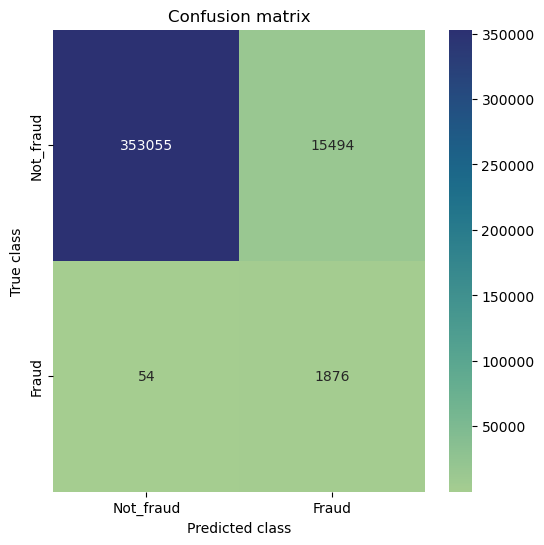

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    368549
           1       0.11      0.97      0.19      1930

    accuracy                           0.96    370479
   macro avg       0.55      0.96      0.59    370479
weighted avg       1.00      0.96      0.97    370479



In [ ]:
results(y_test, y_pred)

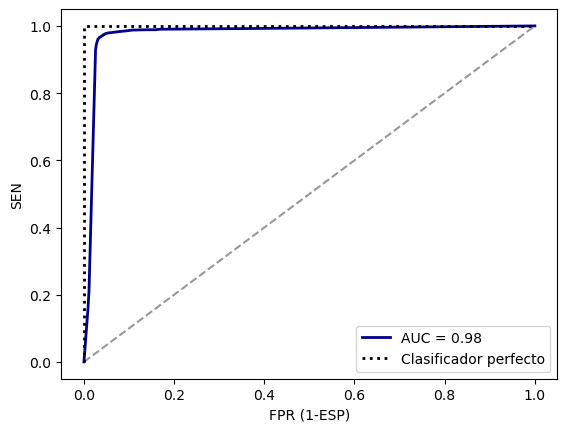

In [ ]:
y_prob = treeModel.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkblue',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Si nos fijamos en los *falsos positivos*, da peor resultado que optimizando la profundidad. Así que seguimos haciendo pruebas:

### Decision Tree con capacidad máxima de expansión:

Ya no hacemos uso de Grid Search CV

In [ ]:
treeModel = DecisionTreeClassifier(class_weight='balanced', random_state=17)
treeModel.fit(X_train, y_train)

y_pred = treeModel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) # Compute the F1 score ("balanced F-score") Very interesting in imbalanced datasets

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]


print("Accuracy del modelo DecisionTree con máxima capacidad de expansión de las ramas:", accuracy)
print("Precisión del modelo DecisionTree con máxima capacidad de expansión de las ramas:", precision)
print("Recall del modelo DecisionTree con máxima capacidad de expansión de las ramas:", recall)
print("F1-Score del modelo DecisionTree con máxima capacidad de expansión de las ramas:", f1)
print("-----")
print("Verdaderos Positivos:", TP)
print("Falsos Negativos:", FN)
print("Falsos Positivos:", FP)
print("Verdaderos Negativos:", TN)

Accuracy del modelo DecisionTree con máxima capacidad de expansión de las ramas: 0.9665244183880868
Precisión del modelo DecisionTree con máxima capacidad de expansión de las ramas: 0.1307475317348378
Recall del modelo DecisionTree con máxima capacidad de expansión de las ramas: 0.960621761658031
F1-Score del modelo DecisionTree con máxima capacidad de expansión de las ramas: 0.23016759776536308
-----
Verdaderos Positivos: 1854
Falsos Negativos: 76
Falsos Positivos: 12326
Verdaderos Negativos: 356223


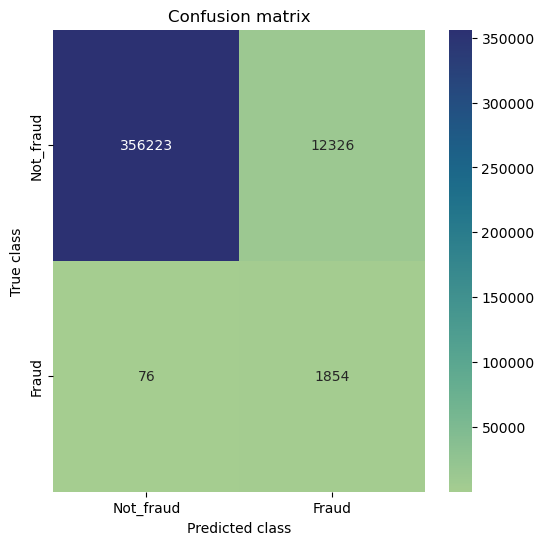

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    368549
           1       0.13      0.96      0.23      1930

    accuracy                           0.97    370479
   macro avg       0.57      0.96      0.61    370479
weighted avg       1.00      0.97      0.98    370479



In [ ]:
results(y_test, y_pred)

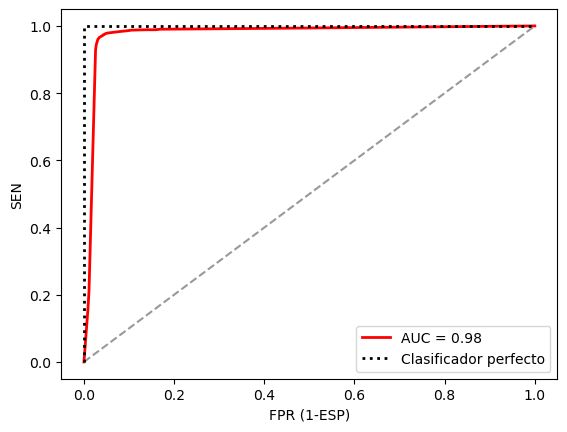

In [ ]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)



plt.figure()
plt.plot(ejex, ejey, color='red',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

No está mal, pero nos da peor tasa de *falsos positivos* que el primer *approach*. Vamos a intentar una nueva estrategia: en vez de optimizar sólo el parámetro de la profundidad, vamos a barrer con `GridSearchCV` el split mínimo de muestras y el mínimo de muestras por "hoja":

In [ ]:
maxDepth = range(1, 15)
minSamplesSplit = range(2, 10)
minSamplesLeaf = range(1, 10)

param_grid = {
    'max_depth': maxDepth,
    'min_samples_split': minSamplesSplit,
    'min_samples_leaf': minSamplesLeaf
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=17), param_grid=param_grid, scoring='f1', cv=10, verbose=1)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])

Fitting 10 folds for each of 1008 candidates, totalling 10080 fits
best mean cross-validation score: 0.968
best parameters: {'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
maxDepthOptimo = grid.best_params_['max_depth']
minSamplesLeafOptimo = grid.best_params_['min_samples_leaf']
minSamplesSplitOptimo = grid.best_params_['min_samples_split']


treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo, min_samples_leaf=minSamplesLeafOptimo, min_samples_split= minSamplesSplitOptimo,
                                   class_weight='balanced', random_state=17).fit(X_train,y_train)

y_pred = treeModel.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) # Compute the F1 score ("balanced F-score") Very interesting in imbalanced datasets

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]


print("Accuracy del modelo DecisionTree optimizando varios parámetros con GridSearchCV:", accuracy)
print("Precisión del modelo DecisionTree optimizando varios parámetros con GridSearchCV:", precision)
print("Recall del modelo DecisionTree optimizando varios parámetros con GridSearchCV:", recall)
print("F1-Score del modelo DecisionTree optimizando varios parámetros con GridSearchCV:", f1)
print("-----")
print("Verdaderos Positivos:", TP)
print("Falsos Negativos:", FN)
print("Falsos Positivos:", FP)
print("Verdaderos Negativos:", TN)

Accuracy del modelo DecisionTree optimizando varios parámetros con GridSearchCV: 0.9718715500743632
Precisión del modelo DecisionTree optimizando varios parámetros con GridSearchCV: 0.1519796704647922
Recall del modelo DecisionTree optimizando varios parámetros con GridSearchCV: 0.960621761658031
F1-Score del modelo DecisionTree optimizando varios parámetros con GridSearchCV: 0.26243895534008066
-----
Verdaderos Positivos: 1854
Falsos Negativos: 76
Falsos Positivos: 10345
Verdaderos Negativos: 358204


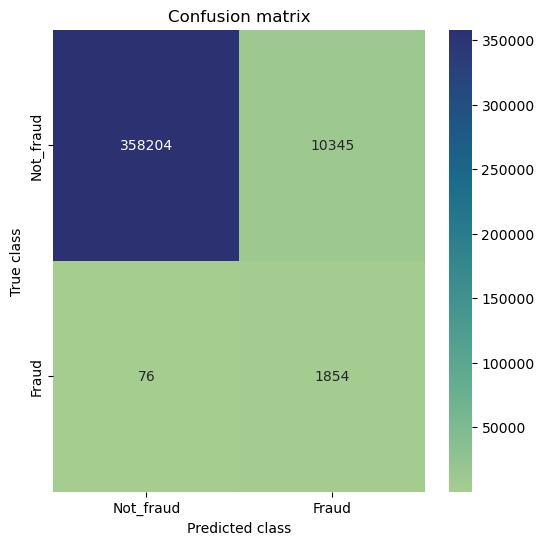

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    368549
           1       0.15      0.96      0.26      1930

    accuracy                           0.97    370479
   macro avg       0.58      0.97      0.62    370479
weighted avg       1.00      0.97      0.98    370479



In [ ]:
results(y_test, y_pred)

Consideramos este modelo como válido para resolver nuestro problema, en el siguiente Notebook resumimos los pasos.